# Class 17: Evaluating Classification and Midsemester Feedback

1. share your favorite rainy day activity (or just say hi) in the zoom chat for attendance
1. log onto prismia

<!-- annotate: Naive Bayes Review --> 
## Naive Bayes Review


Main assumptions: 
- classification assumes that features will separate the gorups
- NB:  conditionally independent

In [1]:
# %load http://drsmb.co/310
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.values[:,:4],
                                                    iris.species.values, 
                                                    test_size=0.5, random_state=0)

In [4]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [5]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica

In [6]:
y_test

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', '

In [7]:
sum(y_pred == y_test)

71

In [8]:
len(y_pred)

75

In [9]:
gnb.score(X_test, y_test)

0.9466666666666667

In [10]:
71/75

0.9466666666666667

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
confusion_matrix(y_test,y_pred,)

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]])

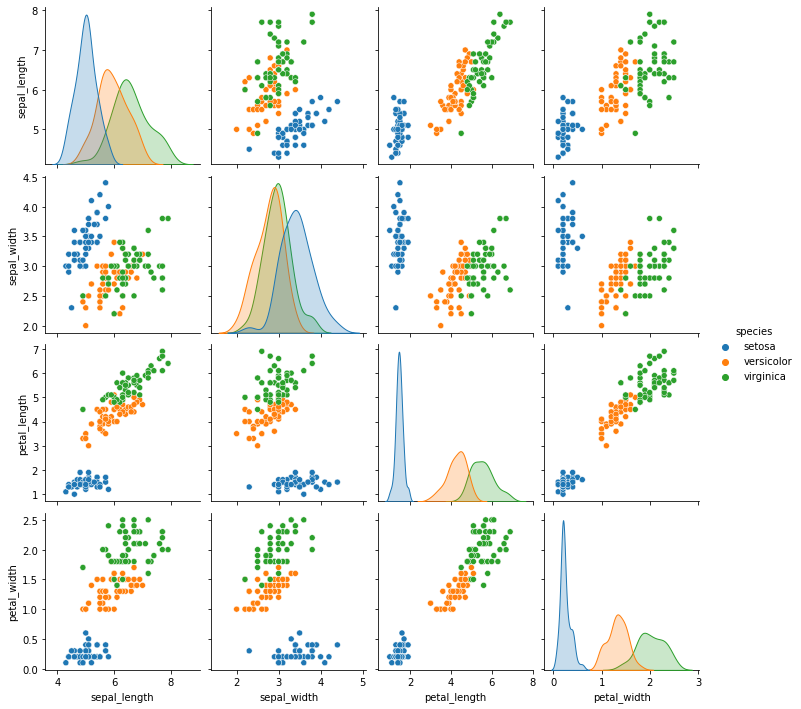

In [13]:
sns.pairplot(data =iris, hue='species')

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.88      1.00      0.94        30
   virginica       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



In [15]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_features_in_': 4,
 'epsilon_': 3.6399040000000003e-09,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'theta_': array([[4.97586207, 3.35862069, 1.44827586, 0.23448276],
        [5.935     , 2.71      , 4.185     , 1.3       ],
        [6.77692308, 3.09230769, 5.73461538, 2.10769231]]),
 'sigma_': array([[0.10321047, 0.13208086, 0.01629013, 0.00846612],
        [0.256275  , 0.0829    , 0.255275  , 0.046     ],
        [0.38869823, 0.10147929, 0.31303255, 0.04763314]]),
 'class_count_': array([29., 20., 26.]),
 'class_prior_': array([0.38666667, 0.26666667, 0.34666667])}

In [16]:
import numpy as np

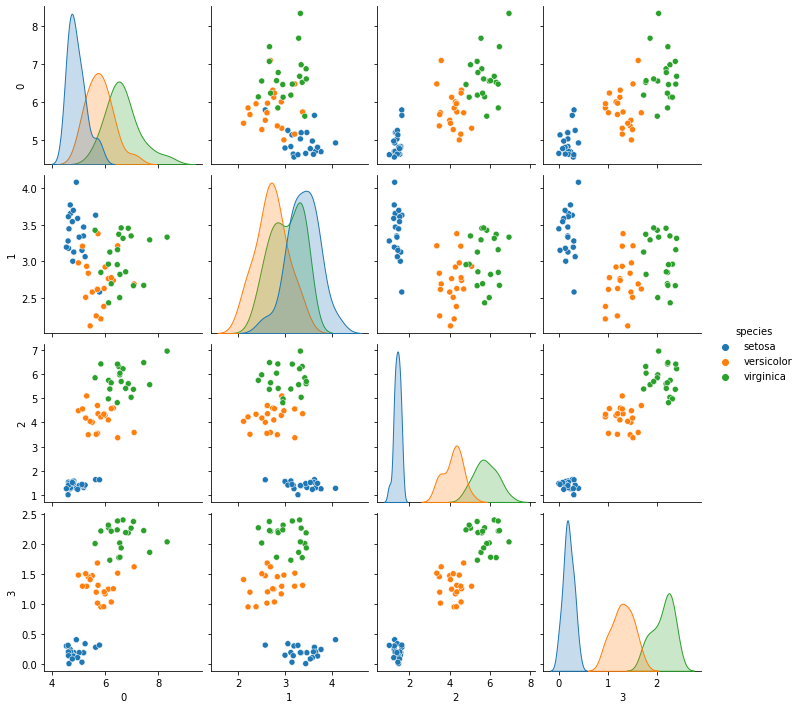

In [17]:
# %load http://drsmb.co/310
df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(mu, sig*np.eye(4),20)
                                  for mu, sig in zip(gnb.theta_,gnb.sigma_)]))
df['species'] = [ci for cl in [[c]*20 for c in gnb.classes_] for ci in cl]
sns.pairplot(data =df, hue='species')

<!-- annotate: Reminder to Stop Early for [feedback survey](https://forms.gle/yqWEPGJjFXDczuDv7) --> 
## Reminder to Stop Early for [feedback survey](https://forms.gle/yqWEPGJjFXDczuDv7)